In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft

In [56]:
plt.rcParams['font.size'] = 15

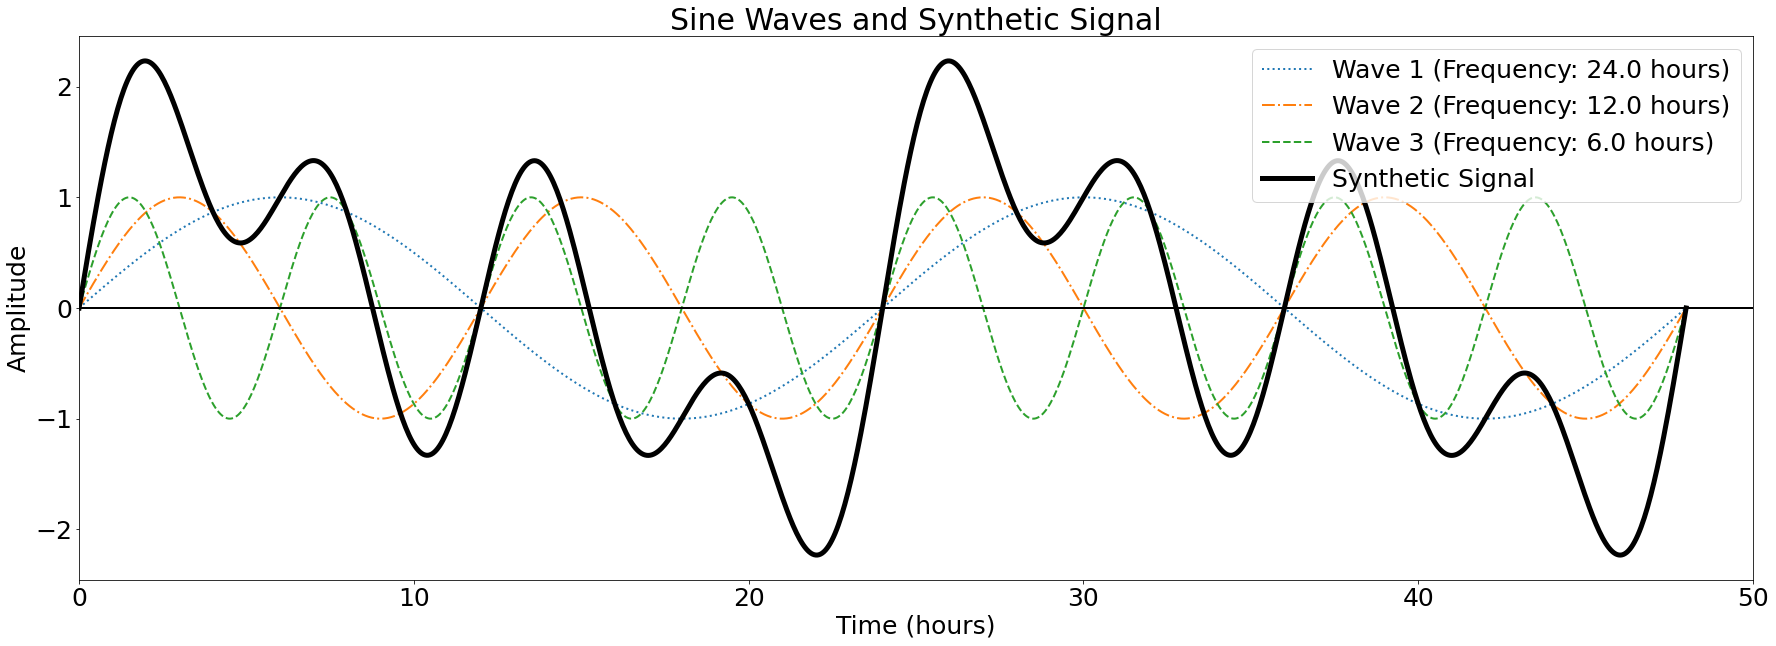

In [66]:
# Define the time array
t = np.linspace(0, 48, num=1000) # 48 hours

# Define the frequencies
frequencies = [1/24, 1/12, 1/6] # frequencies in Hz

# Generate the sine waves
waves = [np.sin(2 * np.pi * f * t) for f in frequencies]

# Generate the synthetic signal
signal = sum(waves)

styles = ['dotted','-.','--']

# Plot the sine waves and the synthetic signal
plt.figure(figsize=(30, 10))
plt.rcParams['font.size'] = 25
for i, wave in enumerate(waves, start=1):
    plt.plot(t, wave, label=f'Wave {i} (Frequency: {1/frequencies[i-1]} hours)',linestyle=styles[i-1],linewidth=2)
plt.plot(t, signal, label='Synthetic Signal', linewidth=5,color='k')
plt.hlines(0,0,50,color='k',linewidth=2)
plt.legend()
plt.title('Sine Waves and Synthetic Signal')
plt.xlabel('Time (hours)')
plt.ylabel('Amplitude')
plt.xlim(0,50)

plt.savefig("C:\\Users\\andfa\\OneDrive\\Documents\\2024 Spring\\tidal_rivers\\demos\\waves.png")

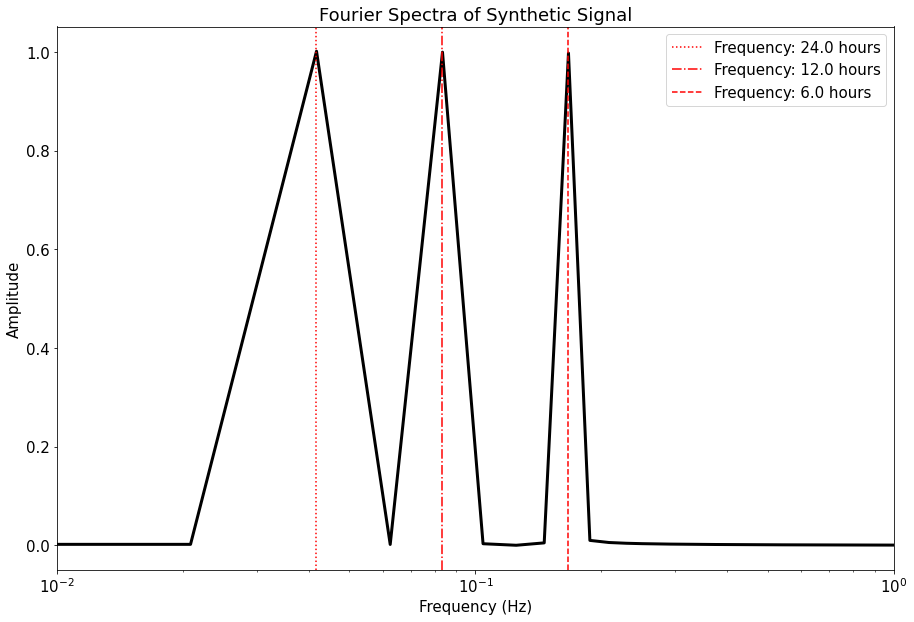

In [67]:
# Compute the Fourier Transform of the synthetic signal
yf = fft(signal)
xf = np.linspace(0.0, 1.0/(2.0*(t[1]-t[0])), len(t)//2)


# Plot the Fourier spectra
plt.figure(figsize=(15, 10))
plt.rcParams['font.size'] = 15
plt.plot(xf, 2.0/len(t) * np.abs(yf[0:len(t)//2]),color='k',linewidth=3)
for i,f in enumerate(frequencies):
    plt.axvline(x=f, color='r', linestyle=styles[i], label='Frequency: {} hours'.format(1/f))
plt.title('Fourier Spectra of Synthetic Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.xscale('log')
plt.legend()
plt.xlim(10e-3,10e-1)

plt.savefig("C:\\Users\\andfa\\OneDrive\\Documents\\2024 Spring\\tidal_rivers\\demos\\spectrum.png")